In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import plotly.graph_objects as go

df_total = pd.read_csv(r'C:\Users\Cecilia\Downloads\ironhack\coursework\group_work\group_project_week4\SQL-Database\notebooks\df_total.csv')

df_total.head()

,year,rank,country,happiness,gdp,social_support,healthy,freedom,generosity,corruption,dystopia
0,2018,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2018,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,2018,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,2018,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,2018,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318


In [27]:
# Sort the DataFrame to get the top 5 countries by rank for each year
df_top5_by_year = df_total.sort_values(['year', 'rank']).groupby('year').head(5)

# Display the top 5 countries for the first 2 years (to check the data)
df_top5_by_year[['year', 'rank', 'country']].head(10)

# Save the DataFrame to a CSV file
output_csv_path = r'C:\Users\Cecilia\Downloads\top5_countries_by_rank_and_year.csv'
df_top5_by_year.to_csv(output_csv_path, index=False)  # index=False to avoid writing row indices

print(f'Table saved to {output_csv_path}')

Table saved to C:\Users\Cecilia\Downloads\top5_countries_by_rank_and_year.csv


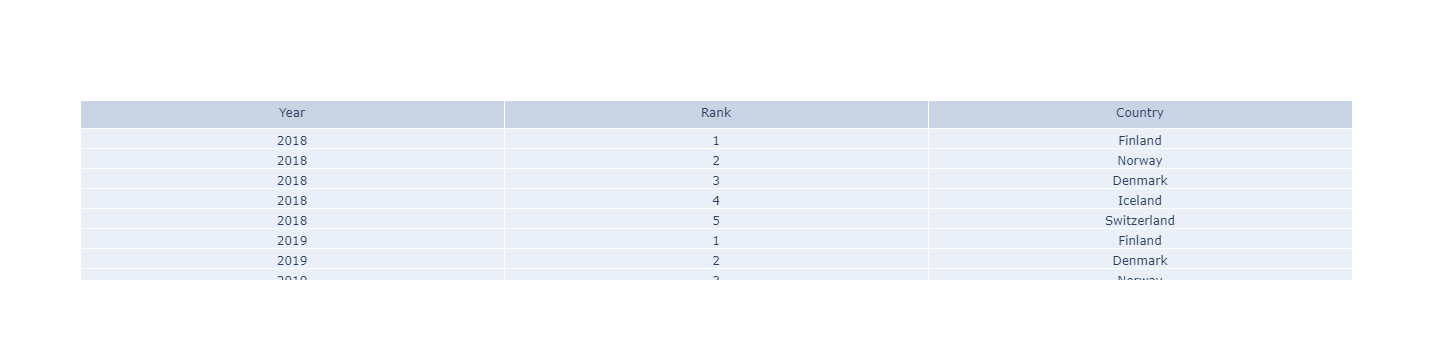

In [29]:
import plotly.graph_objects as go

# Prepare data for the plotly table
top5_table = go.Figure(data=[go.Table(
    header=dict(values=["Year", "Rank", "Country"]),
    cells=dict(values=[df_top5_by_year['year'], df_top5_by_year['rank'], df_top5_by_year['country']])
)])

# Show the table
top5_table.show()

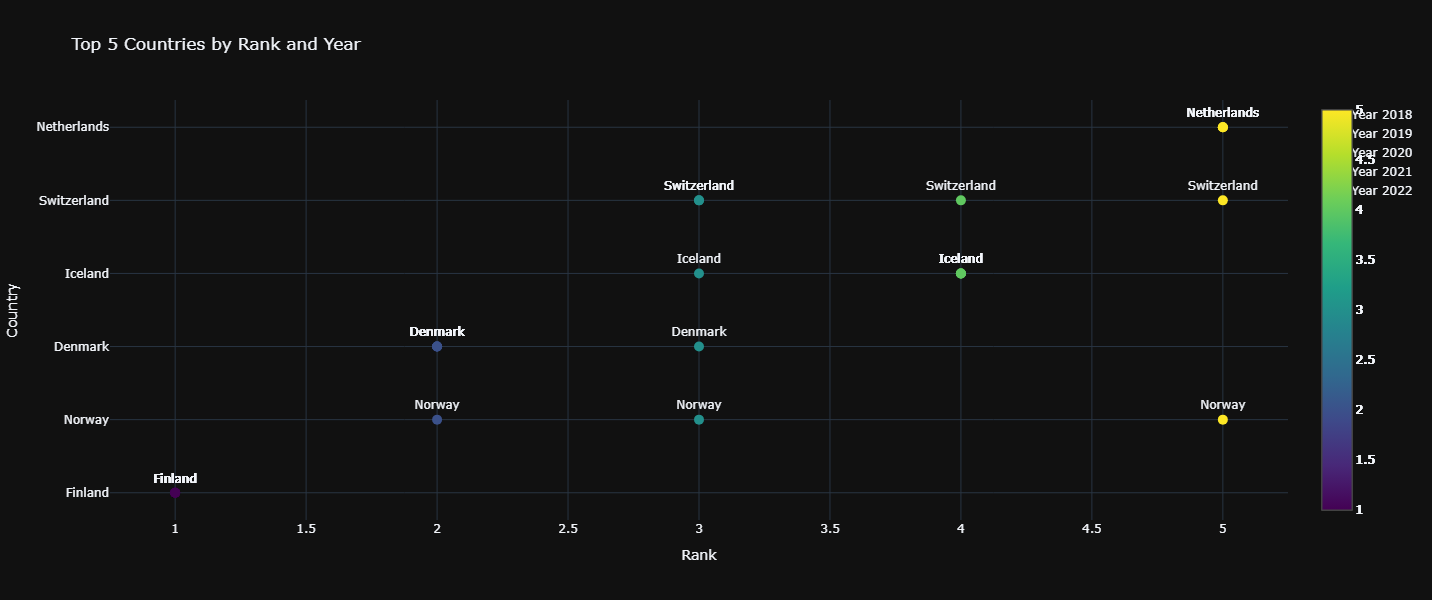

In [31]:
# Sort the DataFrame to get top 5 countries by rank for each year
df_top5_by_year = df_total.sort_values(['year', 'rank']).groupby('year').head(5)

# Create a scatter plot using Plotly with the Viridis color scale
fig = go.Figure()

# Add scatter traces for each year
for year in df_top5_by_year['year'].unique():
    df_year = df_top5_by_year[df_top5_by_year['year'] == year]
    fig.add_trace(go.Scatter(
        x=df_year['rank'],
        y=df_year['country'],
        mode='markers+text',  # Markers for points, and text for country names
        text=df_year['country'],
        textposition='top center',
        name=f'Year {year}',
        marker=dict(
            color=df_year['rank'],  # Color by rank
            colorscale='Viridis',    # Apply the Viridis colorscale
            size=10,                # Marker size
            showscale=True           # Display the color scale
        )
    ))

# Update layout with axis labels, title, and size adjustments
fig.update_layout(
    title='Top 5 Countries by Rank and Year',
    xaxis_title='Rank',
    yaxis_title='Country',
    showlegend=True,
    template='plotly_dark',  # Optional: dark background template
    autosize=True,
    width=1200,  # Adjust width of the figure
    height=600   # Adjust height of the figure
)

# Show the plot
fig.show()

# Save the plot as a PNG file
fig.write_image(r'C:\Users\Cecilia\Downloads\top5_countries_by_rank_and_year.png')

In [33]:
# Sort the DataFrame to get the bottom 10 countries by rank for each year
df_bottom10_by_year = df_total.sort_values(['year', 'rank'], ascending=[True, True]).groupby('year').tail(10)

# Display the bottom 10 countries for the first 2 years (to check the data)
df_bottom10_by_year[['year', 'rank', 'country']].head(20)

# Save the DataFrame to a CSV file
output_csv_path = r'C:\Users\Cecilia\Downloads\bottom10_countries_by_rank_and_year.csv'
df_bottom10_by_year.to_csv(output_csv_path, index=False)  # index=False to avoid writing row indices

print(f'Table saved to {output_csv_path}')

Table saved to C:\Users\Cecilia\Downloads\bottom10_countries_by_rank_and_year.csv


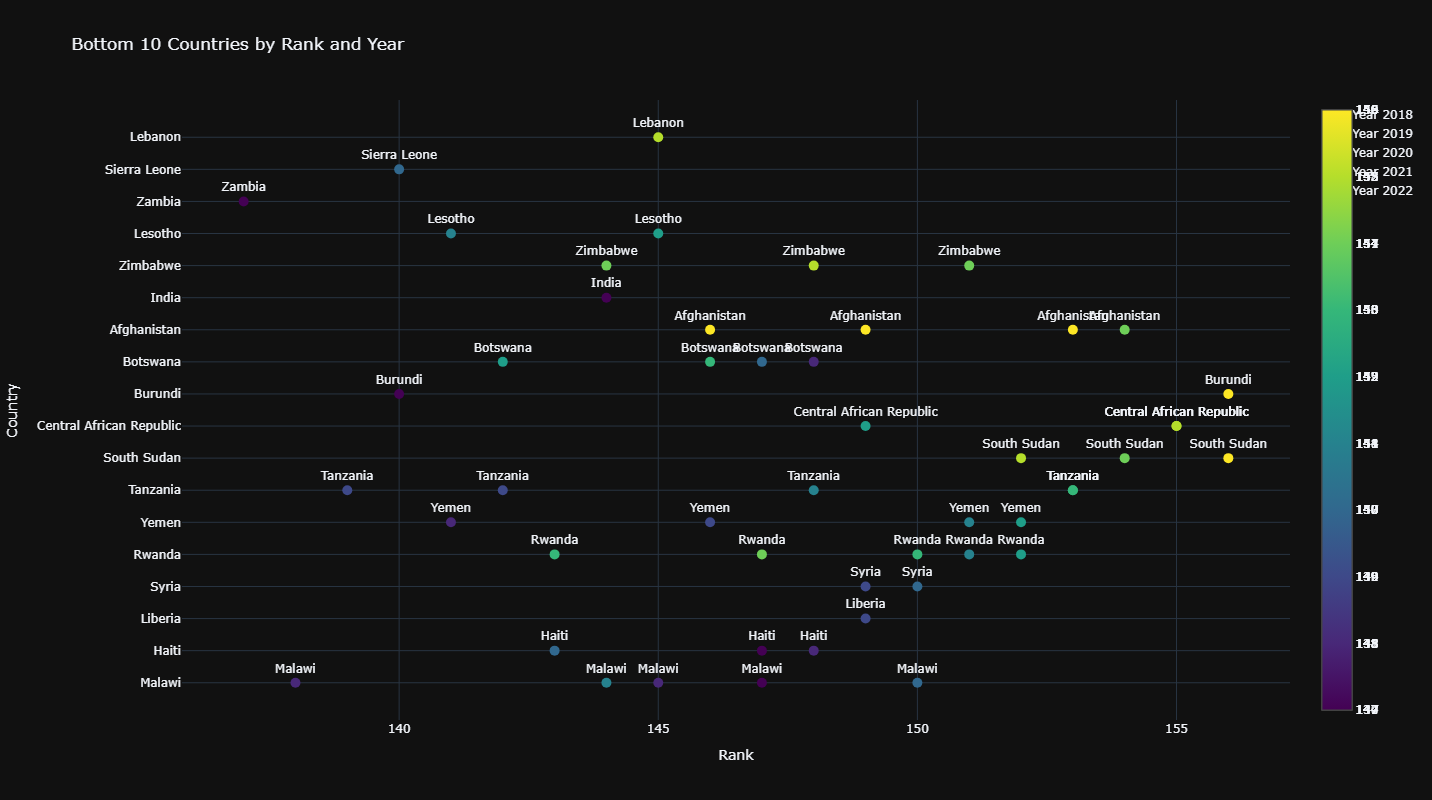

In [35]:
# Create a scatter plot using Plotly
fig = go.Figure()

# Add scatter traces for each year, with a different color for each year
for year in df_bottom10_by_year['year'].unique():
    df_year = df_bottom10_by_year[df_bottom10_by_year['year'] == year]
    fig.add_trace(go.Scatter(
        x=df_year['rank'],
        y=df_year['country'],
        mode='markers+text',  # Markers for points, and text for country names
        text=df_year['country'],
        textposition='top center',
        name=f'Year {year}',
        marker=dict(
            color=df_year['rank'],  # Color by rank (for better differentiation)
            colorscale='Viridis',    # Apply the Viridis colorscale
            size=10,                # Marker size
            showscale=True           # Display the color scale
        )
    ))

# Update layout with axis labels, title, and size adjustments
fig.update_layout(
    title='Bottom 10 Countries by Rank and Year',
    xaxis_title='Rank',
    yaxis_title='Country',
    showlegend=True,
    template='plotly_dark',  # Optional: dark background template
    autosize=True,
    width=1300,  # Adjust width of the figure
    height=800   # Adjust height of the figure
)

# Show the plot
fig.show()

# Save the plot as a PNG file
fig.write_image(r'C:\Users\Cecilia\Downloads\bottom10_countries_by_rank_and_year.png')


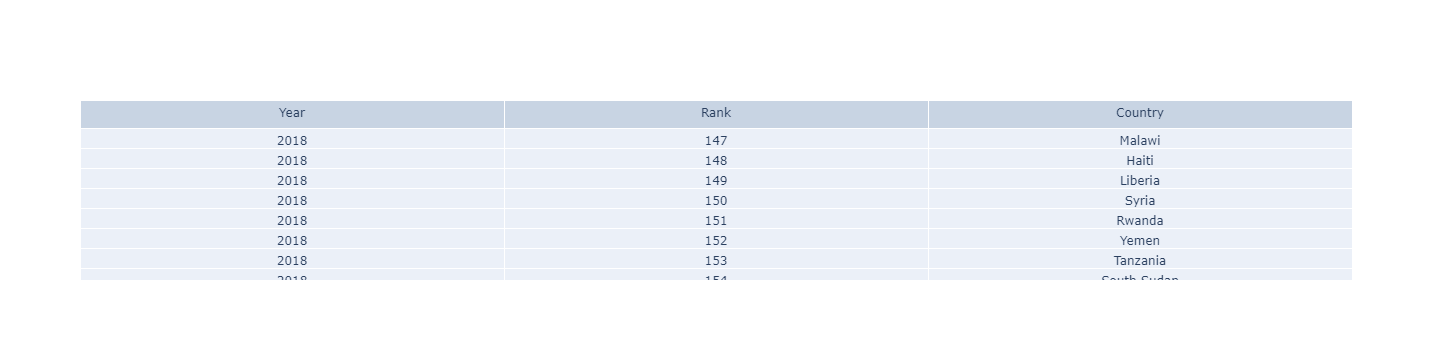

In [37]:
# Prepare data for the plotly table for bottom 10 countries
bottom10_table = go.Figure(data=[go.Table(
    header=dict(values=["Year", "Rank", "Country"]),
    cells=dict(values=[df_bottom10_by_year['year'], df_bottom10_by_year['rank'], df_bottom10_by_year['country']])
)])

# Show the table
bottom10_table.show()

In [40]:
import pandas as pd

# Read the data
df_total = pd.read_csv(r'C:\Users\Cecilia\Downloads\ironhack\coursework\group_work\group_project_week4\SQL-Database\notebooks\df_total.csv')

# Initialize an empty list to store the results
statistics = []

# Get the list of numeric columns
numeric_columns = df_total.select_dtypes(include=['number']).columns

# Calculate statistics per year
for year in df_total['year'].unique():
    # Filter data for the current year
    df_year = df_total[df_total['year'] == year]
    
    for column in numeric_columns:
        # Calculate statistics for each numeric column by year
        mean_val = df_year[column].mean()
        median_val = df_year[column].median()
        max_val = df_year[column].max()
        min_val = df_year[column].min()
        q1 = df_year[column].quantile(0.25)
        q2 = df_year[column].quantile(0.50)  # Median (50%)
        q3 = df_year[column].quantile(0.75)

        # Append the results for each column and year to the list
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': 'Mean',
            'Value': mean_val
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': 'Median',
            'Value': median_val
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': 'Maximum',
            'Value': max_val
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': 'Minimum',
            'Value': min_val
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': '1st Quartile (25%)',
            'Value': q1
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': '2nd Quartile (50%)',
            'Value': q2
        })
        statistics.append({
            'Year': year,
            'Column': column,
            'Statistic': '3rd Quartile (75%)',
            'Value': q3
        })

# Calculate statistics for the total sum (all years combined)
for column in numeric_columns:
    # Calculate statistics for the entire dataset
    mean_val = df_total[column].mean()
    median_val = df_total[column].median()
    max_val = df_total[column].max()
    min_val = df_total[column].min()
    q1 = df_total[column].quantile(0.25)
    q2 = df_total[column].quantile(0.50)  # Median (50%)
    q3 = df_total[column].quantile(0.75)

    # Append the results for each column and total sum to the list
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': 'Mean',
        'Value': mean_val
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': 'Median',
        'Value': median_val
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': 'Maximum',
        'Value': max_val
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': 'Minimum',
        'Value': min_val
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': '1st Quartile (25%)',
        'Value': q1
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': '2nd Quartile (50%)',
        'Value': q2
    })
    statistics.append({
        'Year': 'Total',
        'Column': column,
        'Statistic': '3rd Quartile (75%)',
        'Value': q3
    })

# Convert the list of statistics into a DataFrame
summary_stats_df = pd.DataFrame(statistics)

# Define the path where you want to save the CSV file
output_csv_path = r'C:\Users\Cecilia\Downloads\numeric_column_statistics_by_year_and_total.csv'

# Export the summary statistics to a CSV file
summary_stats_df.to_csv(output_csv_path, index=False)

print(f'Summary statistics for all numeric columns by year and total saved to {output_csv_path}')


Summary statistics for all numeric columns by year and total saved to C:\Users\Cecilia\Downloads\numeric_column_statistics_by_year_and_total.csv
